In [1]:
import tensorflow as tf
import sys
sys.path.append("../models")
from eegsnet import build_eegsnet
import sys
sys.path.append("../utils")
from dataset import create_sequence_dataset

train_ds = create_sequence_dataset(
    image_dir="../data/spectrograms/SC4001E0",
    label_file="../data/spectrograms/SC4001E0/labels.json",
    batch_size=2,
    shuffle=True
)

for x, y in train_ds.take(1):
    print("X:", x.shape)                   
    print("Y main:", y['main_output'].shape) 
    print("Y aux:", y['aux_output'].shape)    


X: (2, 10, 60, 76, 3)
Y main: (2, 10)
Y aux: (2, 10)


In [2]:
model = build_eegsnet(sequence_length=10, input_shape=(60, 76, 3), num_classes=5)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()



In [7]:
model.compile(
    optimizer='adam',
    loss={
        'main_output': loss_fn,
        'aux_output': loss_fn
    },
    loss_weights={
        'main_output': 1.0,
        'aux_output': 0.5
    },
    metrics={
        'main_output': 'accuracy',
        'aux_output': 'accuracy'
    }
)


In [8]:
history = model.fit(
    train_ds,
    epochs=20
)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 320ms/step - aux_output_accuracy: 0.4789 - aux_output_loss: 1.4849 - loss: 2.0501 - main_output_accuracy: 0.4510 - main_output_loss: 1.3069
Epoch 2/20


d:\UNI\پروژه پایانی\Sleep Stage Project 1.0\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - aux_output_accuracy: 0.8790 - aux_output_loss: 0.3804 - loss: 1.2118 - main_output_accuracy: 0.5906 - main_output_loss: 1.0211
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - aux_output_accuracy: 0.9920 - aux_output_loss: 0.0545 - loss: 0.6666 - main_output_accuracy: 0.7518 - main_output_loss: 0.6391
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - aux_output_accuracy: 0.9987 - aux_output_loss: 0.0204 - loss: 0.1948 - main_output_accuracy: 0.9519 - main_output_loss: 0.1845
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - aux_output_accuracy: 0.9991 - aux_output_loss: 0.0113 - loss: 0.0533 - main_output_accuracy: 0.9931 - main_output_loss: 0.0476
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - aux_output_accuracy: 1.0000 - aux_output_loss: 0.0012 - loss: 0.0104 - main_output_accuracy: 1.0000 - main_output_loss: 0.0098
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - aux_output_accuracy: 1.0000 - aux_output_loss: 5.3870e-04 

In [9]:
model.save("../models/eegsnet_full_model.keras")

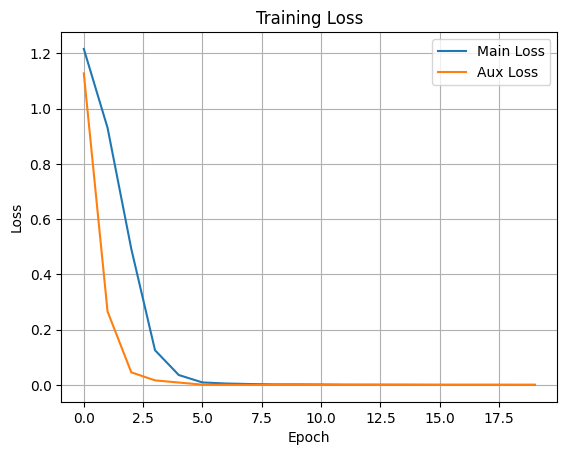

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['main_output_loss'], label='Main Loss')
plt.plot(history.history['aux_output_loss'], label='Aux Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


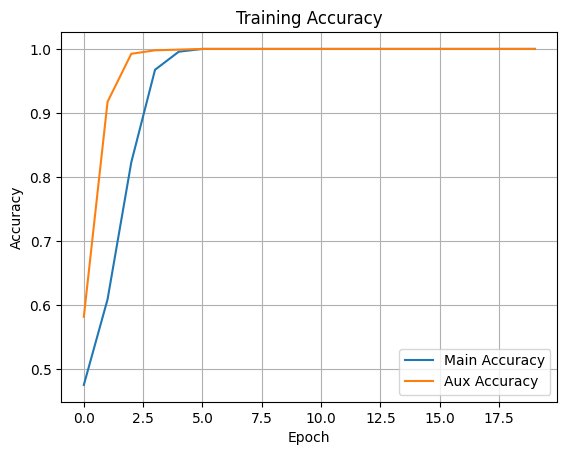

In [11]:
plt.plot(history.history['main_output_accuracy'], label='Main Accuracy')
plt.plot(history.history['aux_output_accuracy'], label='Aux Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import json

with open("../models/eegsnet_history.json", "w") as f:
    json.dump(history.history, f)

In [14]:
val_ds = create_sequence_dataset(
    image_dir="../data/spectrograms/SC4001E0", 
    label_file="../data/spectrograms/SC4001E0/labels.json",
    sequence_length=10,
    batch_size=2,
    shuffle=False
)

In [15]:
results = model.evaluate(val_ds)
print("Evaluation results:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - aux_output_accuracy: 1.0000 - aux_output_loss: 2.5507e-05 - loss: 1.0172e-04 - main_output_accuracy: 1.0000 - main_output_loss: 8.8924e-05
Evaluation results:
loss: 0.0001
compile_metrics: 0.0001
main_output_loss: 0.0000
aux_output_loss: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━

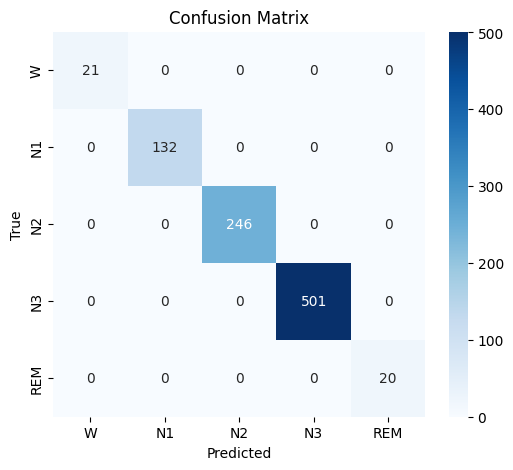

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

for x_batch, y_batch in val_ds:
    preds, _ = model.predict(x_batch)
    pred_classes = np.argmax(preds, axis=-1)  

    y_true.extend(y_batch['main_output'].numpy().flatten())
    y_pred.extend(pred_classes.flatten())

print(classification_report(y_true, y_pred, digits=4))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["W", "N1", "N2", "N3", "REM"], yticklabels=["W", "N1", "N2", "N3", "REM"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [17]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

y_true = []
y_pred = []

In [18]:
for x_batch, y_batch in val_ds:
    preds, _ = model.predict(x_batch)  
    pred_classes = np.argmax(preds, axis=-1)  

    y_true.extend(y_batch['main_output'].numpy().flatten())
    y_pred.extend(pred_classes.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━

In [19]:
print(classification_report(
    y_true, y_pred,
    digits=4,
    target_names=["Wake", "N1", "N2", "N3", "REM"]
))

              precision    recall  f1-score   support

        Wake     1.0000    1.0000    1.0000        21
          N1     1.0000    1.0000    1.0000       132
          N2     1.0000    1.0000    1.0000       246
          N3     1.0000    1.0000    1.0000       501
         REM     1.0000    1.0000    1.0000        20

    accuracy                         1.0000       920
   macro avg     1.0000    1.0000    1.0000       920
weighted avg     1.0000    1.0000    1.0000       920



In [20]:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 1.0000
